In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
sns.set_theme()

In [35]:
CYCLIC_COLUMNS = ["PSVTime", "PSV", "PDVTime", "PDV", "EDVTime", "EDV", "ISVTime", "ISV", "MBF1", "MBF2", "SysTime", "DiasTime", "OSI", "WindowTime"]
TIME_SERIES_COLUMNS = ["Time","BloodFlow","Filtered Blood Flow", "Shear", "Filtered Shear", "Velocity", "Diameter"]
ANALYSIS_SETTINGS_COLUMNS = ["Peak Height Threshold", "Cycle Duration", "Peak Count", "EpochEndTime", "Velocity Calibration", "Time Calibration", "Distance Calibration", "Zero Velocity Row Position"]

In [36]:
filename = "ASCI017- post-occ long flow2  20210122144312671"
folder = f"bloodflow_data/{filename[:7]}"

In [37]:
cyclic = pd.read_csv(f"{folder}/{filename}_cyclic.csv", header = None)

cyclic.columns = CYCLIC_COLUMNS
cyclic

,PSVTime,PSV,PDVTime,PDV,EDVTime,EDV,ISVTime,ISV,MBF1,MBF2,SysTime,DiasTime,OSI,WindowTime
0,0.41133,401.97,0.86279,0.60668,1.1136,182.70,0.15049,182.69,232.03,223.47,0.26084,0.70227,0.047318,0.96311
1,1.32430,465.55,1.77570,52.38600,2.0266,173.49,1.11360,182.70,253.84,231.74,0.21068,0.70227,0.001298,0.91295
2,2.28740,422.36,2.73890,126.72000,3.0599,175.05,2.02660,173.49,248.21,256.49,0.26084,0.77250,0.215500,1.03330
3,3.25050,416.11,3.65180,89.65500,3.9126,187.19,3.05990,175.05,256.47,218.70,0.19062,0.66214,0.172910,0.85276
4,4.17350,407.94,4.51460,110.09000,4.8457,185.04,3.91260,187.19,257.68,240.42,0.26084,0.67217,0.195790,0.93302
5,5.10650,469.83,5.43760,140.82000,5.4476,165.49,4.84570,185.04,307.48,185.08,0.26084,0.34110,0.227580,0.60195


Text(0.5, 1.0, 'ASCI017 Post-Occlusion')

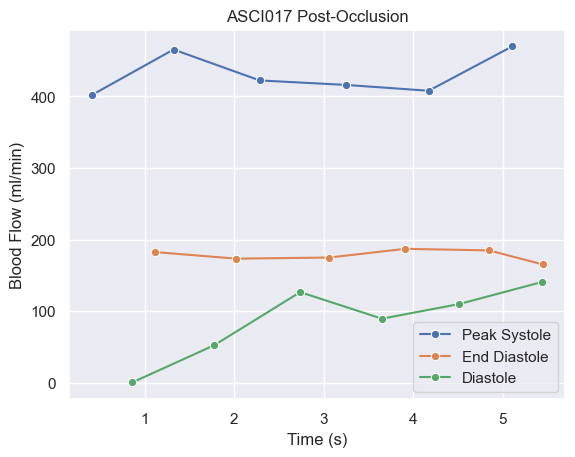

In [38]:
sns.lineplot(data = cyclic, x = "PSVTime", y = "PSV", label = "Peak Systole", marker = 'o')
sns.lineplot(data = cyclic, x = "EDVTime", y = "EDV", label = "End Diastole", marker = 'o')
sns.lineplot(data = cyclic, x = "PDVTime", y = "PDV", label = "Diastole", marker = 'o')
plt.ylabel("Blood Flow (ml/min)")
plt.xlabel("Time (s)")
plt.title(f"{filename[:7]} Post-Occlusion")

Text(0.5, 1.0, 'ASCI017 Post-Occlusion')

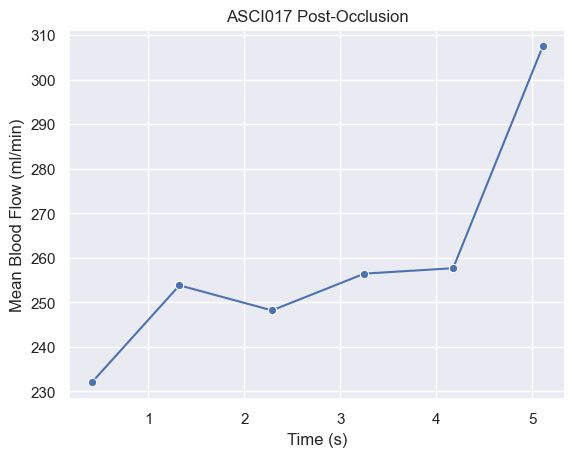

In [39]:
sns.lineplot(data = cyclic, x= "PSVTime", y = "MBF1", marker= 'o' )
plt.ylabel("Mean Blood Flow (ml/min)")
plt.xlabel("Time (s)")
plt.title(f"{filename[:7]} Post-Occlusion")

In [40]:
time_series = pd.read_csv(f"{folder}/{filename}_time_series.csv", header = None)
time_series.columns = TIME_SERIES_COLUMNS
time_series

,Time,BloodFlow,Filtered Blood Flow,Shear,Filtered Shear,Velocity,Diameter
0,0.000000,0.000,-20.381,0.000,-13.389,0.0000,0.50555
1,0.010032,0.000,61.402,0.000,40.338,0.0000,0.50555
2,0.020065,160.620,119.760,105.520,78.678,13.3370,0.50555
3,0.030097,169.330,158.530,111.240,104.140,14.0600,0.50555
4,0.040130,197.560,181.520,129.780,119.250,16.4030,0.50555
...,...,...,...,...,...,...,...
543,5.447600,31.734,165.490,20.847,108.720,2.6348,0.50555
544,5.457600,313.820,201.340,206.160,132.270,26.0570,0.50555
545,5.467700,277.920,242.360,182.580,159.220,23.0750,0.50555
546,5.477700,322.470,282.540,211.840,185.620,26.7740,0.50555


In [41]:
peaks = sp.signal.find_peaks(time_series['Velocity'], distance = 50)[0]
peak_max = time_series['Velocity'].argmax()
peak_max_index = np.where(peaks == peak_max)[0].item()

time_series['Velocity'].iloc[peaks[peak_max_index-2:peak_max_index+3]].mean()

41.7725

<Axes: xlabel='Time', ylabel='Velocity'>

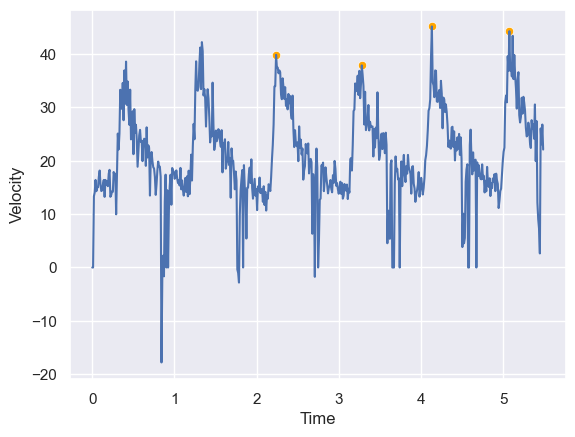

In [42]:
sns.scatterplot(x = time_series['Time'].iloc[peaks[peak_max_index-2:peak_max_index+3]], y = time_series['Velocity'].iloc[peaks[peak_max_index-2:peak_max_index+3]], color = 'orange')
sns.lineplot(time_series,x = "Time",  y = "Velocity")

<Axes: xlabel='Time', ylabel='Filtered Shear'>

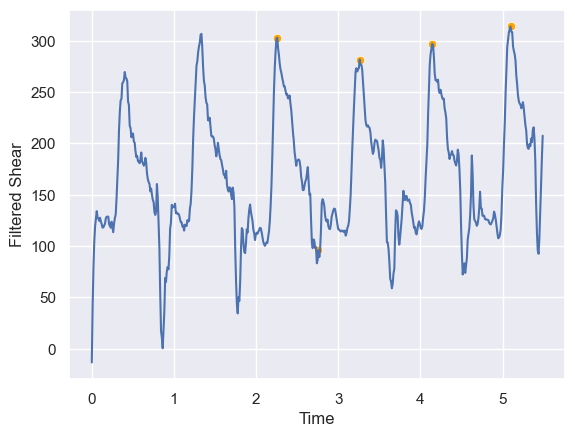

In [43]:
peaks = sp.signal.find_peaks(time_series['Filtered Shear'], distance = 50)[0]
sns.scatterplot(x = time_series['Time'].iloc[peaks[peak_max_index-2:peak_max_index+3]], y = time_series['Filtered Shear'].iloc[peaks[peak_max_index-2:peak_max_index+3]], color = 'orange')
sns.lineplot(time_series,x = "Time",  y = "Filtered Shear")

In [44]:
peak_max = time_series['Filtered Shear'].argmax()
peak_max_index = np.where(peaks == peak_max)[0].item()

time_series['Filtered Shear'].iloc[peaks[peak_max_index-2:peak_max_index+3]].mean()

297.6033333333333